Proyecto Investigación


- Pamela Jacqueline Selman David - 25002792
- Ana Lilian Aguilar Hernández - 17001130
- Hugo Danilo Castillo Torres  - 10002874

Este conjunto de datos proporciona datos detallados sobre la calidad del aire urbano y el impacto en la salud de las principales ciudades de EE. UU. Incluye condiciones climáticas, métricas de contaminación del aire (PM2.5, NO2, CO2) e información relacionada con la salud, como visitas al hospital y problemas de salud. El conjunto de datos está diseñado para ayudar a analizar la relación entre los factores ambientales y la salud pública, ofreciendo información sobre cómo la calidad del aire y las condiciones climáticas afectan los resultados de salud.

# EDA

In [27]:
# ============================================================
# 1. IMPORTACIÓN DE LIBRERÍAS Y CONFIGURACIÓN INICIAL
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Configuración de estilo
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 5)

In [28]:

# ============================================================
# 2. CARGA DEL DATASET
# ============================================================

# 🔸 Si subes el archivo manualmente en Colab:
#from google.colab import files
#uploaded = files.upload()  # selecciona dataset.csv
df = pd.read_csv("dataset.csv")


print("✅ Dataset cargado correctamente")
display(df.head())

✅ Dataset cargado correctamente


,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


In [29]:
# ============================================================
# 3. EXPLORACIÓN INICIAL DEL DATASET
# ============================================================

print("Dimensiones del dataset:", df.shape)
print("\nVista previa:")
display(df.head())

print("\nInformación general:")
df.info()

print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))

Dimensiones del dataset: (1000, 46)

Vista previa:


,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1000 non-null   object 
 1   datetimeEpoch      1000 non-null   float64
 2   tempmax            1000 non-null   float64
 3   tempmin            1000 non-null   float64
 4   temp               1000 non-null   float64
 5   feelslikemax       1000 non-null   float64
 6   feelslikemin       1000 non-null   float64
 7   feelslike          1000 non-null   float64
 8   dew                1000 non-null   float64
 9   humidity           1000 non-null   float64
 10  precip             1000 non-null   float64
 11  precipprob         1000 non-null   float64
 12  precipcover        1000 non-null   float64
 13  preciptype         378 non-null    object 
 14  snow               1000 non-null   float64
 15  snowdepth          929 non-null    float64
 16  win

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
count,1000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000,1000.000000,1000.000000,1000.000000,569.0,1000.0,1000,1000,1000,1000.000000
unique,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,NaN,NaN,NaN,NaN,NaN,1,7,2,NaN
top,2024-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Chicago,NaN,NaN,NaN,NaN,NaN,Fall,Saturday,False,NaN
freq,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131,NaN,NaN,NaN,NaN,NaN,1000,205,668,NaN
mean,NaN,1.726284e+09,85.106961,68.641638,76.115967,85.195384,68.547548,76.323286,57.267120,56.782281,...,NaN,16.469899,80.195613,3.057743,0.0,9.0,NaN,NaN,NaN,9.729103
std,NaN,3.745834e+05,9.524231,8.474102,8.722070,9.496951,8.365809,8.621361,9.161517,16.708667,...,NaN,5.552785,6.053805,0.624024,0.0,0.0,NaN,NaN,NaN,0.679728
min,NaN,1.725624e+09,62.035432,49.108218,55.548415,62.206413,48.834041,57.748822,26.261814,11.752135,...,NaN,1.676587,65.511677,1.578048,0.0,9.0,NaN,NaN,NaN,8.492431
25%,NaN,1.725948e+09,78.661118,62.678245,69.102499,78.485332,62.734961,68.930104,51.229378,49.982029,...,NaN,13.319119,76.287207,2.583375,0.0,9.0,NaN,NaN,NaN,9.195244
50%,NaN,1.726285e+09,84.322847,67.702405,75.222751,84.284077,67.844544,75.544961,58.598490,58.486182,...,NaN,16.694710,78.562345,3.026242,0.0,9.0,NaN,NaN,NaN,9.546156
75%,NaN,1.726616e+09,91.653987,75.585109,82.396698,93.757026,75.591093,84.309449,62.738294,66.560400,...,NaN,20.734495,85.318985,3.507127,0.0,9.0,NaN,NaN,NaN,10.242523


In [30]:
# Eliminar duplicados
duplicados_antes = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"\nDuplicados eliminados: {duplicados_antes}")

# Identificar tipos de columnas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()


Duplicados eliminados: 0


In [31]:
# Remover columnas no necesarias para análisis numérico
cols_excluir = ['datetimeEpoch', 'sunriseEpoch', 'sunsetEpoch']
num_cols = [col for col in num_cols if col not in cols_excluir]

In [32]:
print(f"\n Conteov variables numéricas: {len(num_cols)}")
print(f" Conteo variables categóricas: {len(cat_cols)}")
print(f" Variables booleanas: {len(bool_cols)}")


 Conteov variables numéricas: 30
 Conteo variables categóricas: 12
 Variables booleanas: 1


In [33]:
# ============================================================
# 4. LIMPIEZA DE DATOS
# ============================================================

# 🔸 4.1. Eliminar duplicados
df.drop_duplicates(inplace=True)

# 🔸 4.2. Reemplazar valores nulos o vacíos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Ejemplo: rellenar nulos numéricos con la media
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Ejemplo: rellenar nulos categóricos con la moda
cat_cols = df.select_dtypes(exclude=np.number).columns
for c in cat_cols:
    df[c].fillna(df[c].mode()[0], inplace=True)

# 🔸 4.3. Limpieza de espacios en columnas categóricas
for c in cat_cols:
    df[c] = df[c].astype(str).str.strip().str.lower()


Valores nulos por columna:
datetime               0
datetimeEpoch          0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype           622
snow                   0
snowdepth             71
windgust               0
windspeed              0
winddir                0
pressure               0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
sunrise                0
sunriseEpoch           0
sunset                 0
sunsetEpoch            0
moonphase              0
conditions             0
description            0
icon                   0
stations             933
source                 0
City                   0
Temp_Range             0
Heat_Index            

C:\Users\pamel\AppData\Local\Temp\ipykernel_8024\674152323.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].mode()[0], inplace=True)


In [34]:

# ============================================================
# 5. NORMALIZACIÓN DE VARIABLES NUMÉRICAS
# ============================================================

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

print(f"\n {len(num_cols)} variables normalizadas (media=0, std=1)")
print("\n Primeras 5 filas normalizadas:")
display(df_scaled[num_cols].head())


 33 variables normalizadas (media=0, std=1)

 Primeras 5 filas normalizadas:


,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunriseEpoch,sunsetEpoch,moonphase,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Health_Risk_Score
0,-1.580954,2.205274,2.639755,2.567651,1.981059,2.338356,2.271858,-0.629809,-2.142612,-0.385228,...,-0.330943,-1.584987,-1.580980,-1.520920,-0.246828,2.598524,2.200148,0.0,0.0,1.167325
1,-1.350182,1.974169,2.167492,2.212053,1.612336,1.931736,1.854082,-0.935588,-2.112672,-0.385228,...,-0.330943,-1.354577,-1.350866,-1.317054,0.077496,1.997380,1.318330,0.0,0.0,0.490483
2,-1.119410,2.089722,1.801488,2.131757,1.549126,1.560995,1.656798,-1.700036,-2.388116,-0.385228,...,-0.330943,-1.124167,-1.120754,-1.113187,0.834251,1.719374,0.917503,0.0,0.0,-0.082010
3,-0.888639,2.205274,1.482711,2.039989,1.622871,1.309847,1.563959,-1.983974,-2.459971,-0.241376,...,-0.330943,-0.893760,-0.890643,-0.909320,1.518935,1.560659,-0.331151,0.0,0.0,-0.467455
4,-0.657867,2.205274,1.588970,2.051460,1.665011,1.369644,1.587169,-1.874767,-2.447995,-0.289327,...,-0.330943,-0.663350,-0.660531,-0.637498,1.356773,1.580756,0.533993,0.0,0.0,-0.314878


In [35]:
# ============================================================
# 6. ANÁLISIS EXPLORATORIO (EDA)
# ============================================================

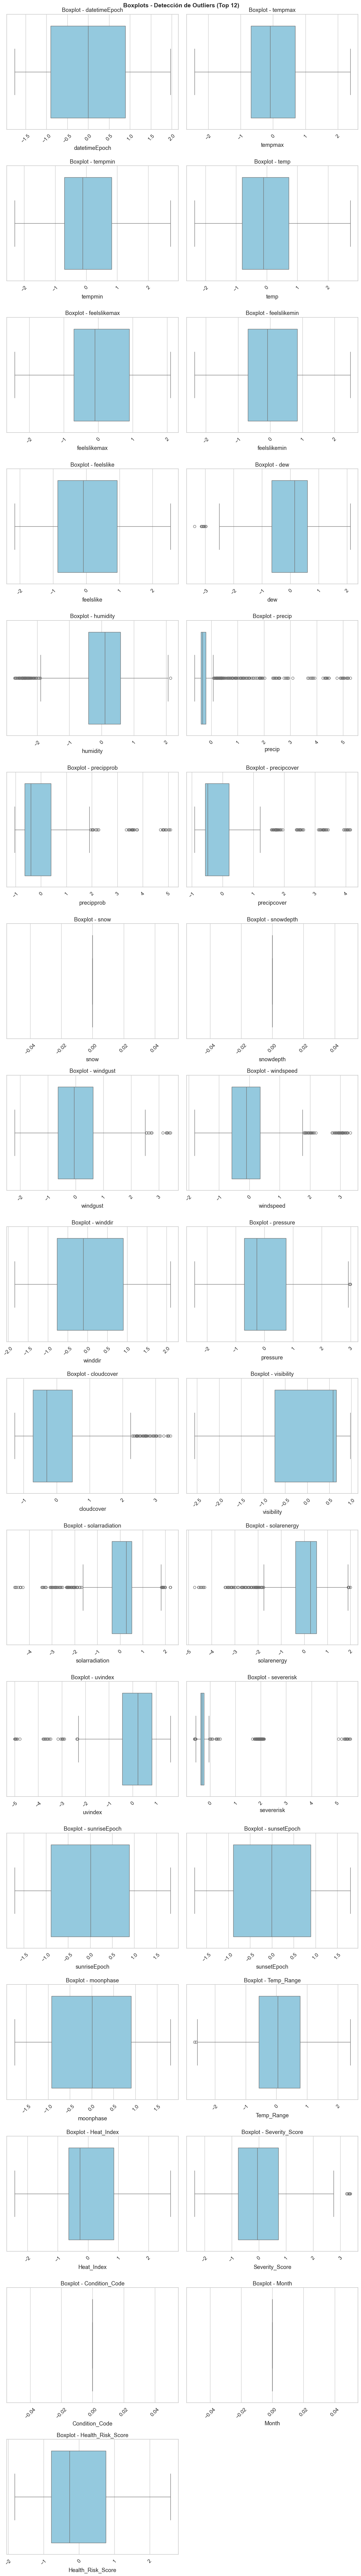

In [36]:
# 🔸 6.1. Distribución de variables numéricas (boxplots)

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Número de variables
num_vars = len(num_cols)

# Configurar 2 gráficos por fila
cols = 2
rows = math.ceil(num_vars / cols)

# Crear figura con subplots en matriz
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()  # Aplanar para indexar fácilmente

# Graficar cada boxplot
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_scaled, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot - {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Ocultar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Boxplots - Detección de Outliers (Top 12)', fontsize=14, weight='bold', y=0.995)
plt.tight_layout()
plt.show()



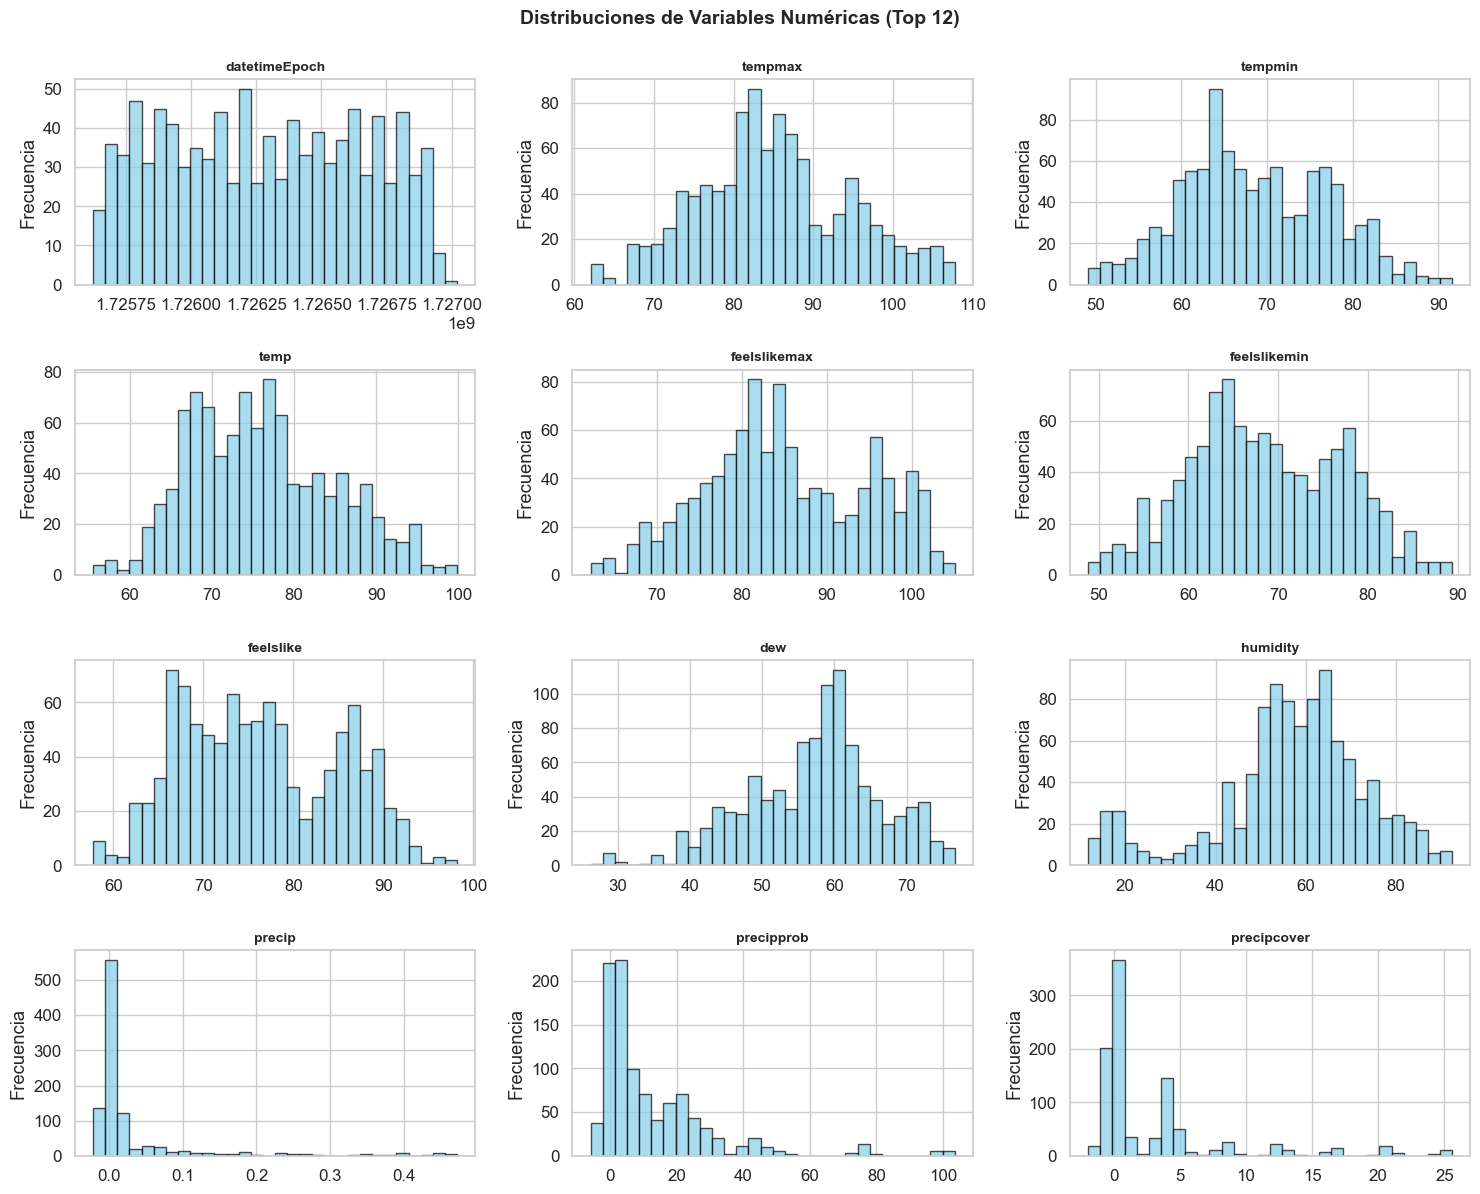

In [37]:
# Distribuciones (Histogramas de variables originales)

n_vars = min(12, len(num_cols))  # Mostrar máximo 12, puede cambiarse a conveniencia
cols_to_plot = num_cols[:n_vars]

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    df[col].hist(ax=axes[i], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(col, fontsize=10, weight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Distribuciones de Variables Numéricas (Top 12)', fontsize=14, weight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [38]:
# 🔸 6.2. Matriz de correlación
corr_matrix = df_scaled[num_cols].corr()

print("\nMatriz de correlación:")
display(corr_matrix)


Matriz de correlación:


,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunriseEpoch,sunsetEpoch,moonphase,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Health_Risk_Score
datetimeEpoch,1.000000,-0.009753,0.152861,0.045901,-0.015768,0.164148,0.055531,0.046728,0.000268,0.053142,...,0.285721,0.992032,0.992068,0.990523,-0.243548,0.083644,-0.369008,NaN,NaN,-0.111190
tempmax,-0.009753,1.000000,0.808405,0.936353,0.952111,0.801754,0.912584,0.045593,-0.609694,-0.047861,...,0.305707,-0.016824,-0.008860,-0.010851,0.465754,0.780744,0.277908,NaN,NaN,0.354713
tempmin,0.152861,0.808405,1.000000,0.944321,0.820330,0.988296,0.939621,0.258251,-0.396124,0.129018,...,0.366885,0.146502,0.149014,0.147357,-0.127163,0.738725,0.226903,NaN,NaN,0.434786
temp,0.045901,0.936353,0.944321,1.000000,0.920431,0.939750,0.976463,0.150877,-0.538453,0.041237,...,0.343067,0.039187,0.044418,0.042298,0.163660,0.800903,0.275709,NaN,NaN,0.412288
feelslikemax,-0.015768,0.952111,0.820330,0.920431,1.000000,0.821445,0.942921,0.262477,-0.418409,0.038671,...,0.408079,-0.020071,-0.015194,-0.017145,0.377892,0.815434,0.247352,NaN,NaN,0.518574
feelslikemin,0.164148,0.801754,0.988296,0.939750,0.821445,1.000000,0.942326,0.290646,-0.375796,0.126306,...,0.387913,0.158598,0.160489,0.159993,-0.132728,0.740163,0.230200,NaN,NaN,0.454905
feelslike,0.055531,0.912584,0.939621,0.976463,0.942921,0.942326,1.000000,0.288758,-0.425092,0.081487,...,0.427733,0.049190,0.054036,0.051623,0.130651,0.827673,0.267552,NaN,NaN,0.522430
dew,0.046728,0.045593,0.258251,0.150877,0.262477,0.290646,0.288758,1.000000,0.706298,0.338506,...,0.392131,0.054370,0.042825,0.038797,-0.310402,0.072294,-0.038384,NaN,NaN,0.581391
humidity,0.000268,-0.609694,-0.396124,-0.538453,-0.418409,-0.375796,-0.425092,0.706298,1.000000,0.296729,...,0.067886,0.011669,-0.002842,-0.006098,-0.434812,-0.520533,-0.243100,NaN,NaN,0.186211
precip,0.053142,-0.047861,0.129018,0.041237,0.038671,0.126306,0.081487,0.338506,0.296729,1.000000,...,0.074407,0.057210,0.050426,0.046980,-0.268911,0.006086,-0.151194,NaN,NaN,0.143755


In [39]:

# Mostrar correlaciones más fuertes
print("\n Top 10 Correlaciones más fuertes:")
# Obtener triángulo superior sin diagonal
mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
corr_pairs = corr_matrix.where(mask_upper).stack().sort_values(ascending=False)
print(corr_pairs.head(10))



 Top 10 Correlaciones más fuertes:
datetimeEpoch   sunsetEpoch     0.992068
                sunriseEpoch    0.992032
sunriseEpoch    sunsetEpoch     0.991750
solarradiation  solarenergy     0.991296
datetimeEpoch   moonphase       0.990523
sunriseEpoch    moonphase       0.989948
sunsetEpoch     moonphase       0.989882
tempmin         feelslikemin    0.988296
temp            feelslike       0.976463
tempmax         feelslikemax    0.952111
dtype: float64


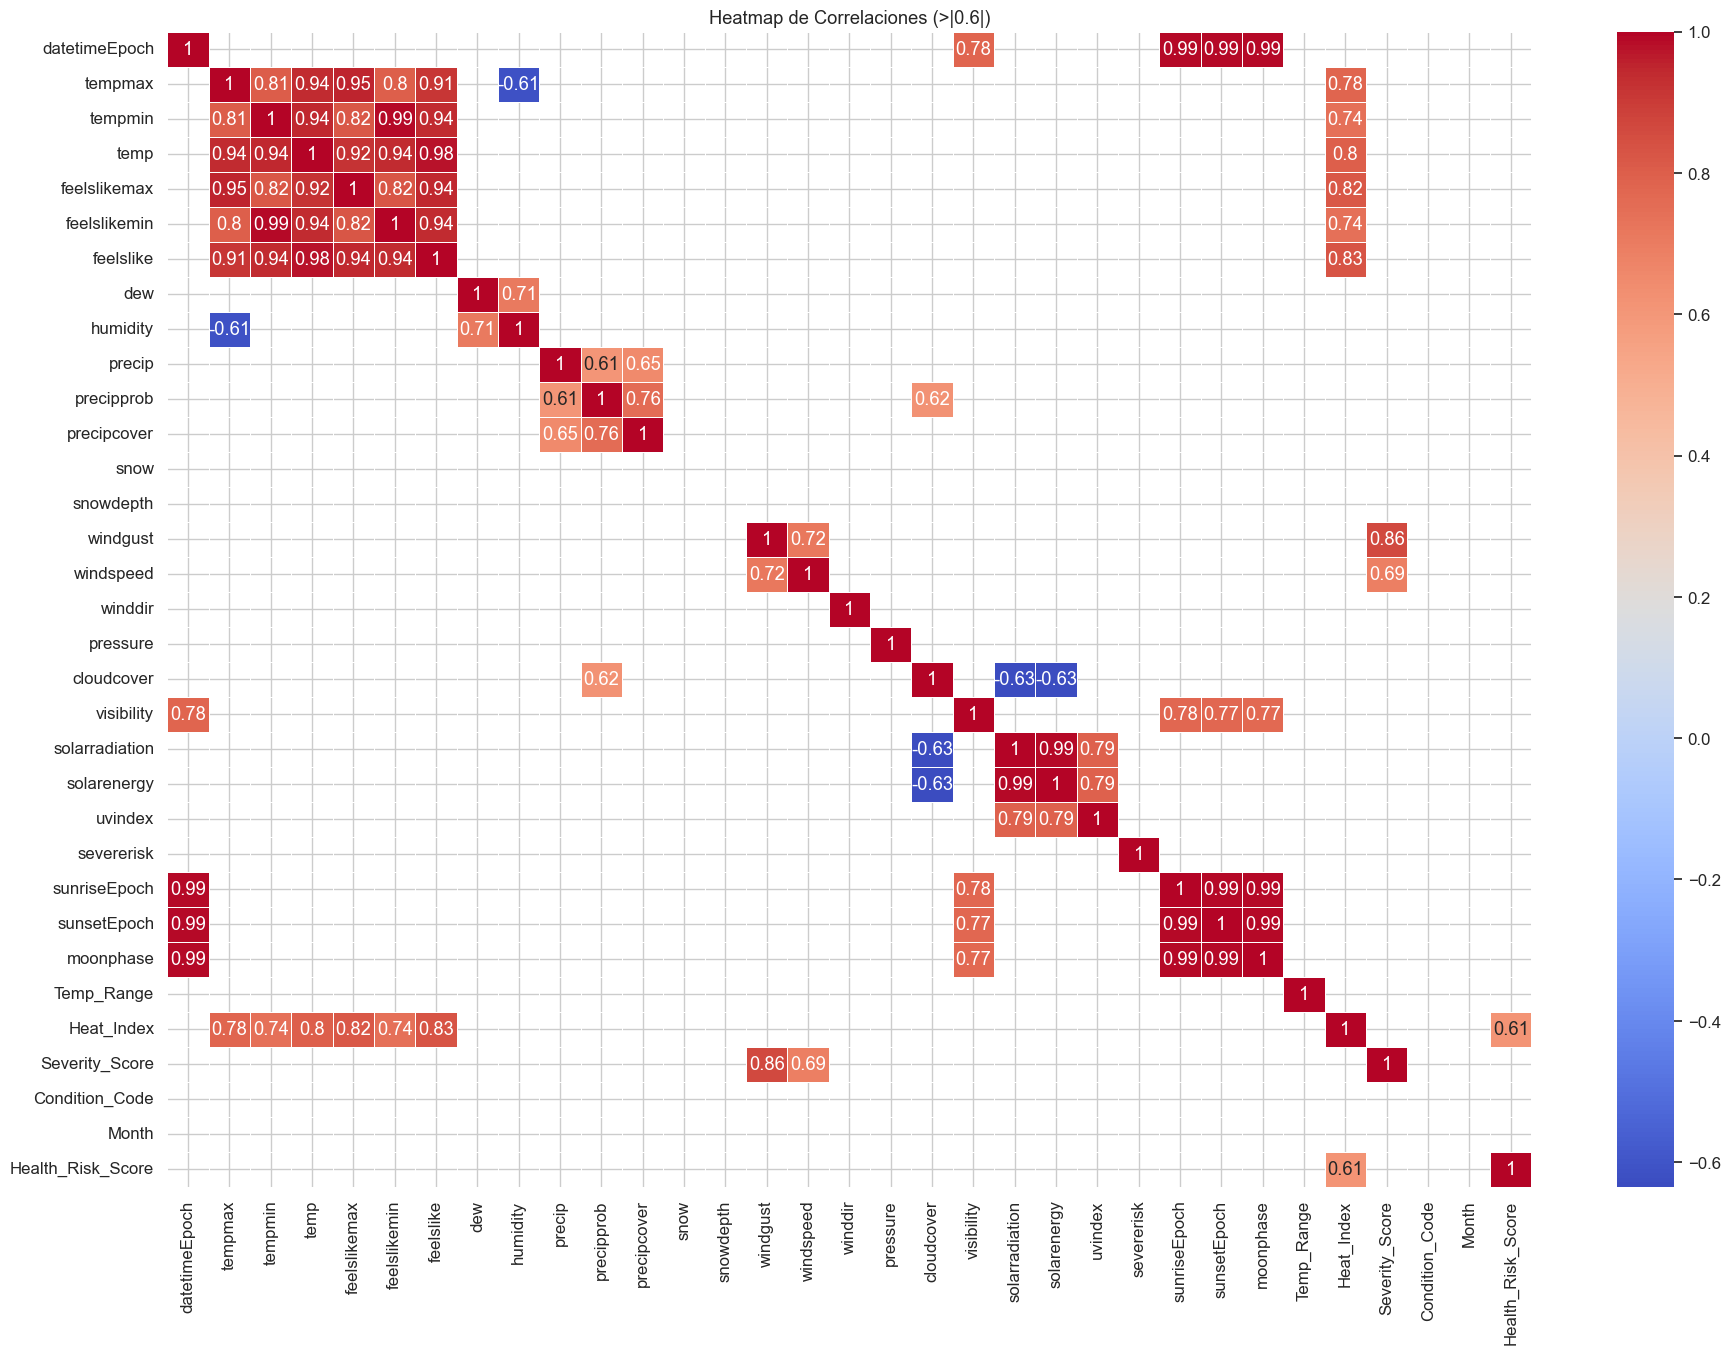

In [40]:
# 🔸 6.3. Heatmap de correlación

# Filtrar correlaciones fuertes
threshold = 0.6
mask = np.abs(corr_matrix) >= threshold
filtered_corr = corr_matrix.where(mask)

plt.figure(figsize=(22, 15))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlaciones (>|0.6|)")
plt.show()

In [41]:
# ============================================================
# 7. RESUMEN FINAL
# ============================================================

print("\n✅ Limpieza, normalización y EDA completados correctamente.")
print("Columnas numéricas:", list(num_cols))
print("Columnas categóricas:", list(cat_cols))


✅ Limpieza, normalización y EDA completados correctamente.
Columnas numéricas: ['datetimeEpoch', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'pressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunriseEpoch', 'sunsetEpoch', 'moonphase', 'Temp_Range', 'Heat_Index', 'Severity_Score', 'Condition_Code', 'Month', 'Health_Risk_Score']
Columnas categóricas: ['datetime', 'preciptype', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'stations', 'source', 'City', 'Season', 'Day_of_Week', 'Is_Weekend']


# PCA


 PCA aplicado: 33 componentes generados
   Componente  Varianza explicada  Varianza acumulada
0         PC1        2.675433e-01            0.267543
1         PC2        2.194581e-01            0.487001
2         PC3        1.624710e-01            0.649472
3         PC4        7.880395e-02            0.728276
4         PC5        6.013673e-02            0.788413
5         PC6        4.385277e-02            0.832266
6         PC7        3.176951e-02            0.864035
7         PC8        3.022931e-02            0.894265
8         PC9        2.286684e-02            0.917132
9        PC10        1.535366e-02            0.932485
10       PC11        1.411613e-02            0.946601
11       PC12        1.157275e-02            0.958174
12       PC13        1.100547e-02            0.969180
13       PC14        8.173598e-03            0.977353
14       PC15        7.849335e-03            0.985202
15       PC16        6.168751e-03            0.991371
16       PC17        3.604975e-03        

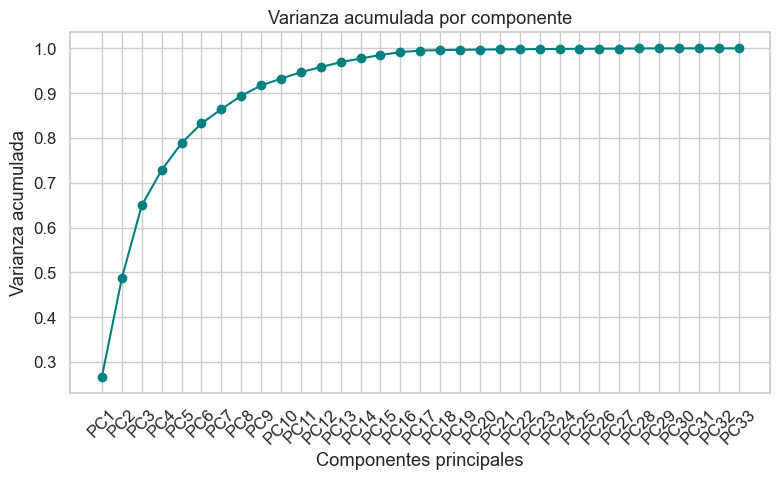

Cargas de cada variable en los componentes:
                        PC1       PC2       PC3       PC4       PC5       PC6  \
datetimeEpoch     -0.002160 -0.287354  0.283161  0.167672 -0.060974  0.012522   
tempmax            0.324602  0.042625  0.098451 -0.186166 -0.035070  0.072737   
tempmin            0.326091 -0.087432  0.026822 -0.056956 -0.055510 -0.164251   
temp               0.341687 -0.018538  0.053332 -0.134882 -0.060723 -0.051806   
feelslikemax       0.335472  0.002884  0.041752 -0.149862  0.092163  0.121475   
feelslikemin       0.326819 -0.092204  0.025222 -0.040678 -0.047275 -0.142313   
feelslike          0.348163 -0.040260  0.026505 -0.095578  0.016565  0.002311   
dew                0.092788 -0.178924 -0.209508  0.135632  0.391369  0.216116   
humidity          -0.156136 -0.148964 -0.224301  0.184171  0.391195  0.103843   
precip             0.027074 -0.183667 -0.214716 -0.087079  0.094916 -0.112393   
precipprob         0.076620 -0.242955 -0.252080 -0.010280  0.0366

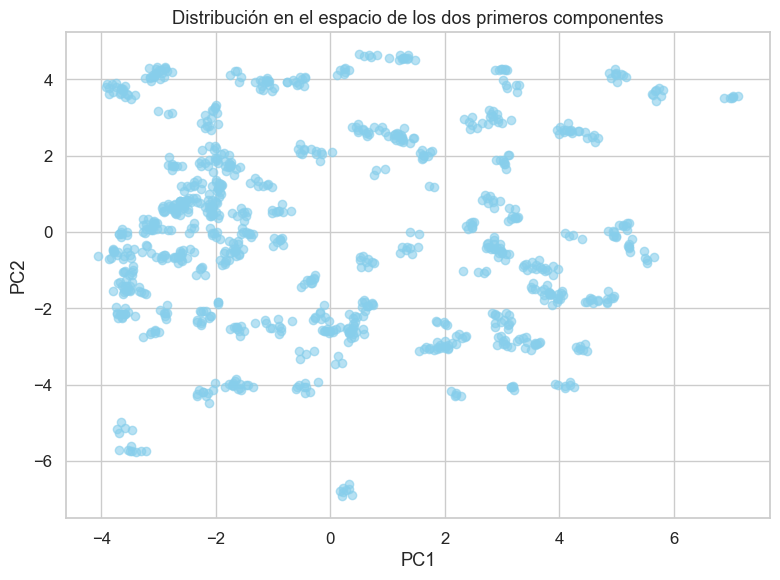

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Aplicar PCA
pca = PCA()
pca_components = pca.fit_transform(df_scaled[num_cols])

n_components_total = pca_components.shape[1]
print(f"\n PCA aplicado: {n_components_total} componentes generados")

# Crear DataFrame con componentes
df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

# Mostrar varianza explicada por componente
explained_var = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Varianza explicada': pca.explained_variance_ratio_,
    'Varianza acumulada': pca.explained_variance_ratio_.cumsum()
})
print(explained_var)

# Visualizar varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(explained_var['Componente'], explained_var['Varianza acumulada'], marker='o', color='teal')
plt.title('Varianza acumulada por componente')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza acumulada')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar cargas (loadings) de cada variable
loadings = pd.DataFrame(pca.components_.T, index=num_cols, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
print("Cargas de cada variable en los componentes:")
print(loadings)

# Visualizar los dos primeros componentes
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.6, color='skyblue')
plt.title('Distribución en el espacio de los dos primeros componentes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Clustering

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [44]:
# Determinar número óptimo de clusters (Método del Codo)
print("\n" + "="*60)
print("ANÁLISIS DE CLUSTERING K-MEANS")
print("="*60)

# Calcular inercia (WCSS) para diferentes valores de k
inertias = []
silhouette_scores = []
k_range = range(2, 11)  # Probar de 2 a 10 clusters

print("\nCalculando métricas para diferentes valores de k...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))
    print(f"k={k}: Inercia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.3f}")


ANÁLISIS DE CLUSTERING K-MEANS

Calculando métricas para diferentes valores de k...
k=2: Inercia=22869.33, Silhouette=0.231


c:\Users\pamel\anaconda3\envs\INVEST-4T\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\pamel\anaconda3\envs\INVEST-4T\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


k=3: Inercia=19476.81, Silhouette=0.212
k=4: Inercia=16631.88, Silhouette=0.237


c:\Users\pamel\anaconda3\envs\INVEST-4T\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\pamel\anaconda3\envs\INVEST-4T\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


k=5: Inercia=14636.11, Silhouette=0.260
k=6: Inercia=13205.55, Silhouette=0.257


c:\Users\pamel\anaconda3\envs\INVEST-4T\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\pamel\anaconda3\envs\INVEST-4T\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


k=7: Inercia=12066.15, Silhouette=0.259


c:\Users\pamel\anaconda3\envs\INVEST-4T\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


k=8: Inercia=11210.40, Silhouette=0.264


c:\Users\pamel\anaconda3\envs\INVEST-4T\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


k=9: Inercia=10421.54, Silhouette=0.275


c:\Users\pamel\anaconda3\envs\INVEST-4T\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


k=10: Inercia=9719.88, Silhouette=0.301


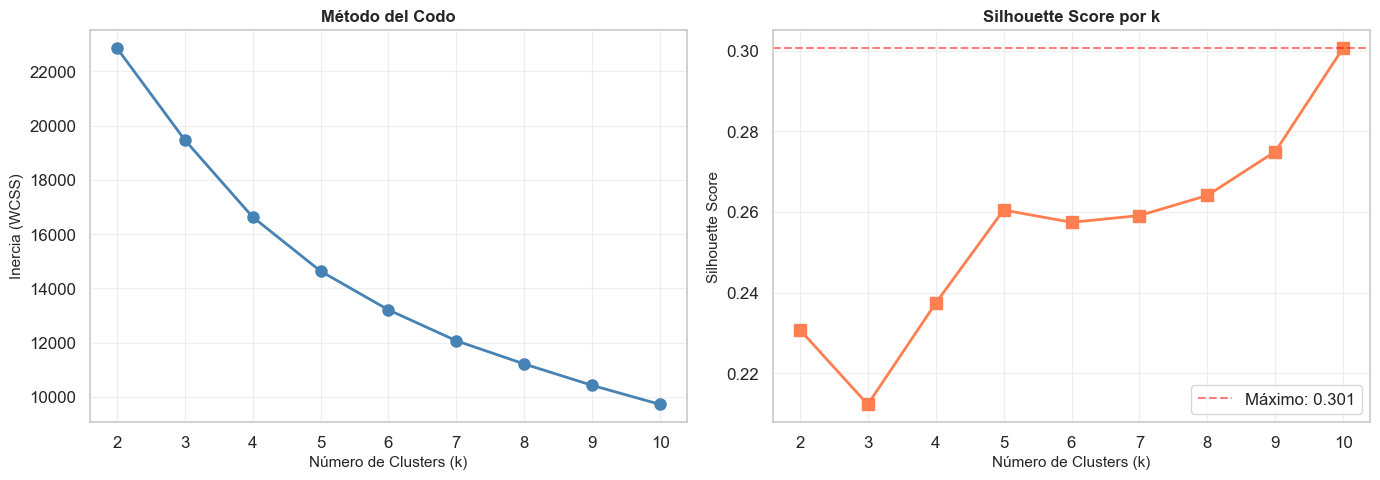

In [45]:
# Visualizar Método del Codo y Silhouette Score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico del Codo
axes[0].plot(k_range, inertias, marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0].set_xlabel('Número de Clusters (k)', fontsize=11)
axes[0].set_ylabel('Inercia (WCSS)', fontsize=11)
axes[0].set_title('Método del Codo', fontsize=12, weight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

# Gráfico de Silhouette Score
axes[1].plot(k_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='coral')
axes[1].set_xlabel('Número de Clusters (k)', fontsize=11)
axes[1].set_ylabel('Silhouette Score', fontsize=11)
axes[1].set_title('Silhouette Score por k', fontsize=12, weight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)
axes[1].axhline(y=max(silhouette_scores), color='red', linestyle='--', alpha=0.5,
                label=f'Máximo: {max(silhouette_scores):.3f}')
axes[1].legend()

plt.tight_layout()
plt.show()


In [46]:
# Recomendar k óptimo
k_optimo_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"\n K óptimo según Silhouette Score: {k_optimo_silhouette}")
print(f"   Silhouette Score: {max(silhouette_scores):.3f}")



 K óptimo según Silhouette Score: 10
   Silhouette Score: 0.301


In [47]:
# Aplicar K-Means con k óptimo
k_final = k_optimo_silhouette  # Puedes cambiarlo manualmente si lo deseas
print(f"\n Aplicando K-Means con k={k_final}")

kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(df_pca)

print(f" Clustering completado. Columna 'Cluster' agregada al dataset.")
print(f"\nDistribución de clusters:")
print(df['Cluster'].value_counts().sort_index())



 Aplicando K-Means con k=10


c:\Users\pamel\anaconda3\envs\INVEST-4T\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


 Clustering completado. Columna 'Cluster' agregada al dataset.

Distribución de clusters:
Cluster
0    129
1    148
2    142
3     99
4    129
5     74
6     61
7     20
8    153
9     45
Name: count, dtype: int64


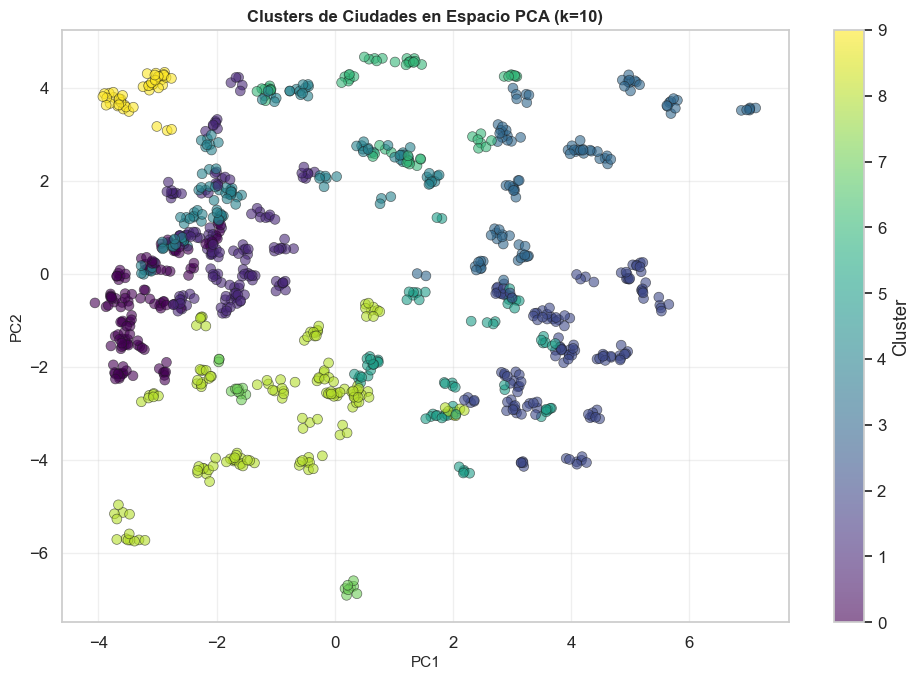

In [48]:
# Visualizar clusters en espacio PCA (PC1 vs PC2)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'],
                     c=df['Cluster'], cmap='viridis',
                     alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PC1', fontsize=11)
plt.ylabel('PC2', fontsize=11)
plt.title(f'Clusters de Ciudades en Espacio PCA (k={k_final})', fontsize=12, weight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [49]:
#  Perfiles de clusters (promedios de variables originales)
print("\n" + "="*60)
print("PERFILES DE CLUSTERS")
print("="*60)

# Variables clave para interpretar perfiles
vars_clave = ['temp', 'humidity', 'windspeed', 'precip', 'solarradiation',
              'cloudcover', 'Temp_Range', 'Health_Risk_Score']

# Asegurar que las variables existan
vars_disponibles = [v for v in vars_clave if v in df.columns]

cluster_profiles = df.groupby('Cluster')[vars_disponibles].mean()
print("\nPromedios por cluster (variables clave):")
print(cluster_profiles.round(2))



PERFILES DE CLUSTERS

Promedios por cluster (variables clave):
          temp  humidity  windspeed  precip  solarradiation  cloudcover  \
Cluster                                                                   
0        66.44     60.18       9.18    0.00          254.33       13.05   
1        72.68     58.18       7.99    0.00          257.71       12.85   
2        85.98     55.07      11.84    0.03          247.35       27.04   
3        91.05     22.40       8.63    0.00          280.03        9.43   
4        71.36     69.96       9.86    0.00          270.93       21.43   
5        80.34     75.62       8.30    0.12          226.10       43.94   
6        76.64     51.62      14.13    0.01          291.54       16.48   
7        72.87     84.07      12.95    0.33           81.36       81.14   
8        75.21     55.37       8.84    0.06          177.44       43.57   
9        61.69     54.44      13.52   -0.00          255.14       10.92   

         Temp_Range  Health_Risk_Sc

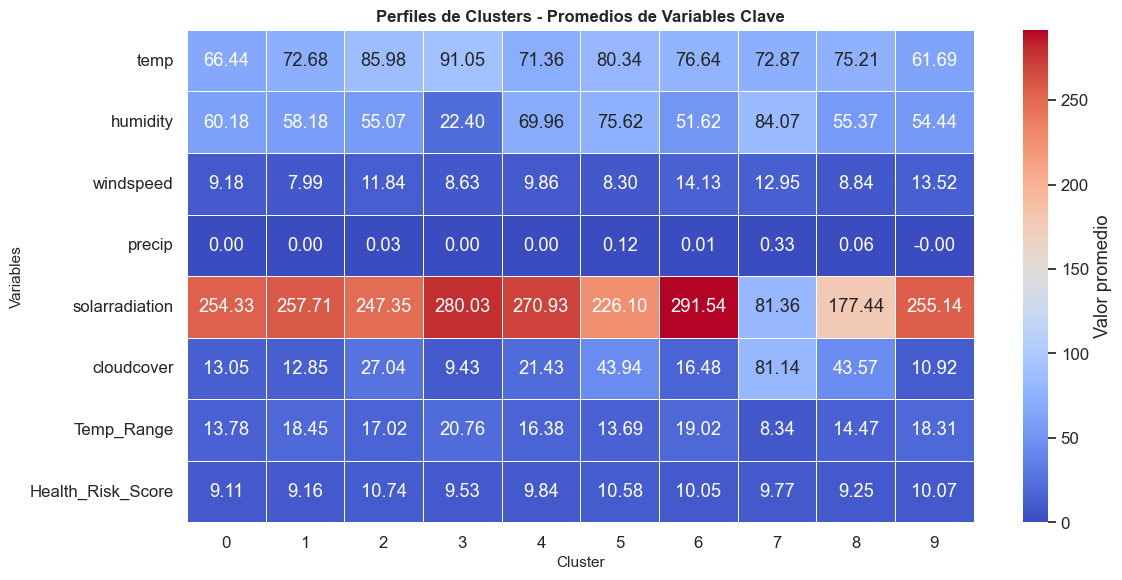

In [50]:
# Visualizar perfiles de clusters (Heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profiles.T, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, cbar_kws={'label': 'Valor promedio'})
plt.title(f'Perfiles de Clusters - Promedios de Variables Clave', fontsize=12, weight='bold')
plt.xlabel('Cluster', fontsize=11)
plt.ylabel('Variables', fontsize=11)
plt.tight_layout()
plt.show()

In [51]:
# Interpretación de clusters por ciudad
print("CIUDADES POR CLUSTER")


if 'City' in df.columns:
    for i in range(k_final):
        ciudades_cluster = df[df['Cluster'] == i]['City'].unique()
        print(f"\n  Cluster {i} ({len(ciudades_cluster)} ciudades):")
        print(f"   {', '.join(ciudades_cluster[:10])}")  # Mostrar hasta 10 ciudades
        if len(ciudades_cluster) > 10:
            print(f"   ... y {len(ciudades_cluster) - 10} más")

CIUDADES POR CLUSTER

  Cluster 0 (3 ciudades):
   san jose, los angeles, san diego

  Cluster 1 (4 ciudades):
   new york city, chicago, philadelphia, dallas

  Cluster 2 (4 ciudades):
   phoenix, san antonio, dallas, houston

  Cluster 3 (3 ciudades):
   phoenix, los angeles, dallas

  Cluster 4 (3 ciudades):
   san jose, los angeles, san diego

  Cluster 5 (3 ciudades):
   san antonio, dallas, houston

  Cluster 6 (3 ciudades):
   san antonio, dallas, houston

  Cluster 7 (3 ciudades):
   new york city, philadelphia, houston

  Cluster 8 (4 ciudades):
   phoenix, new york city, chicago, philadelphia

  Cluster 9 (3 ciudades):
   new york city, chicago, philadelphia


In [52]:
# Caracterización automática de clusters
print("CARACTERIZACIÓN DE CLUSTERS")

for i in range(k_final):
    cluster_data = cluster_profiles.loc[i]
    print(f"\n Cluster {i}:")

    # Temperatura
    if cluster_data['temp'] > df['temp'].quantile(0.66):
        print(f"   • Temperaturas ALTAS (promedio: {cluster_data['temp']:.1f}°C)")
    elif cluster_data['temp'] < df['temp'].quantile(0.33):
        print(f"   • Temperaturas BAJAS (promedio: {cluster_data['temp']:.1f}°C)")
    else:
        print(f"   • Temperaturas MODERADAS (promedio: {cluster_data['temp']:.1f}°C)")

    # Humedad
    if cluster_data['humidity'] > df['humidity'].quantile(0.66):
        print(f"   • ALTA humedad ({cluster_data['humidity']:.1f}%)")
    elif cluster_data['humidity'] < df['humidity'].quantile(0.33):
        print(f"   • BAJA humedad ({cluster_data['humidity']:.1f}%)")

    # Viento
    if cluster_data['windspeed'] > df['windspeed'].quantile(0.66):
        print(f"   • Vientos FUERTES ({cluster_data['windspeed']:.1f} km/h)")

    # Precipitación
    if cluster_data['precip'] > df['precip'].quantile(0.66):
        print(f"   • ALTA precipitación ({cluster_data['precip']:.1f} mm)")

    # Radiación solar
    if cluster_data['solarradiation'] > df['solarradiation'].quantile(0.66):
        print(f"   • ALTA radiación solar ({cluster_data['solarradiation']:.1f} W/m²)")

    # Health Risk Score
    print(f"   • Health Risk Score promedio: {cluster_data['Health_Risk_Score']:.2f}")

CARACTERIZACIÓN DE CLUSTERS

 Cluster 0:
   • Temperaturas BAJAS (promedio: 66.4°C)
   • Health Risk Score promedio: 9.11

 Cluster 1:
   • Temperaturas MODERADAS (promedio: 72.7°C)
   • Health Risk Score promedio: 9.16

 Cluster 2:
   • Temperaturas ALTAS (promedio: 86.0°C)
   • Vientos FUERTES (11.8 km/h)
   • ALTA precipitación (0.0 mm)
   • Health Risk Score promedio: 10.74

 Cluster 3:
   • Temperaturas ALTAS (promedio: 91.1°C)
   • BAJA humedad (22.4%)
   • ALTA radiación solar (280.0 W/m²)
   • Health Risk Score promedio: 9.53

 Cluster 4:
   • Temperaturas MODERADAS (promedio: 71.4°C)
   • ALTA humedad (70.0%)
   • ALTA radiación solar (270.9 W/m²)
   • Health Risk Score promedio: 9.84

 Cluster 5:
   • Temperaturas ALTAS (promedio: 80.3°C)
   • ALTA humedad (75.6%)
   • ALTA precipitación (0.1 mm)
   • Health Risk Score promedio: 10.58

 Cluster 6:
   • Temperaturas MODERADAS (promedio: 76.6°C)
   • BAJA humedad (51.6%)
   • Vientos FUERTES (14.1 km/h)
   • ALTA precipitación 

# Modelado

# Visualizacion e Interpretabilidad